In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt

C:\Users\reshm\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
#converting y_train having 2 dim array to 1dim array
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    
   

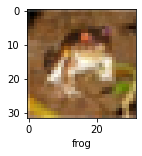

In [10]:
plot_sample(X_train,y_train,0)

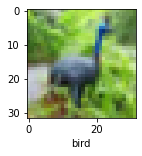

In [11]:
plot_sample(X_train,y_train,6)

In [12]:
#scaling (converting each pixel in 0 to 1 range)
#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [13]:
X_train=X_train/255.0
X_test=X_test/255.0
#so the data is normalized

# Building simple artificial neural network for image classification

In [14]:
ann=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                     layers.Dense(3000,activation='relu'),
                     layers.Dense(1000,activation='relu'),
                     layers.Dense(10,activation='softmax')])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 100s 63ms/step - loss: 1.8103 - accuracy: 0.3529
Epoch 2/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.6233 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.5408 - accuracy: 0.4583
Epoch 4/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.4808 - accuracy: 0.4796
Epoch 5/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.4325 - accuracy: 0.4964


In [15]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.4666 - accuracy: 0.4791


[1.466566562652588, 0.47909998893737793]

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(X_test)
y_pred_class=[np.argmax(i) for i in y_pred]
print('classification Report : \n',classification_report(y_test,y_pred_class))

313/313 [==============================] - 5s 17ms/step
classification Report : 
               precision    recall  f1-score   support

           0       0.47      0.59      0.52      1000
           1       0.59      0.63      0.61      1000
           2       0.36      0.38      0.37      1000
           3       0.38      0.22      0.28      1000
           4       0.41      0.39      0.40      1000
           5       0.45      0.33      0.38      1000
           6       0.44      0.68      0.53      1000
           7       0.63      0.47      0.54      1000
           8       0.48      0.74      0.59      1000
           9       0.67      0.37      0.48      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



In [17]:
#the performance is low .so am trying to improve the performnance using CNN

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 49s 30ms/step - loss: 1.5083 - accuracy: 0.4565
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1514 - accuracy: 0.5976
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0193 - accuracy: 0.6435
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9397 - accuracy: 0.6736
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8749 - accuracy: 0.6970
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8254 - accuracy: 0.7144
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7784 - accuracy: 0.7298
Epoch 8/10
1563/1563 [==============================] - 48s 30ms/step - loss: 0.7390 - accuracy: 0.7421
Epoch 9/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6994 - accuracy: 0.7575
Epoch 10/10
1563/1563 [==============================] - 47s 30m

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9627 - accuracy: 0.6891


[0.9626885056495667, 0.6891000270843506]

In [22]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

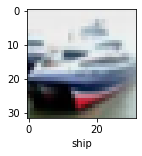

In [23]:
plot_sample(X_test,y_test,1)

In [24]:
y_pred=cnn.predict(X_test)
y_pred[:5]#(the value is probability distrbn as we have used softmax)

313/313 [==============================] - 4s 13ms/step


array([[6.2991300e-04, 4.3285690e-05, 6.9403293e-04, 8.8067335e-01,
        2.8282267e-04, 8.1932530e-02, 2.1453680e-02, 1.6575972e-04,
        1.3514357e-02, 6.1029720e-04],
       [1.4043551e-04, 1.6549535e-01, 6.6649850e-09, 1.2004355e-08,
        1.5910015e-08, 2.2642919e-10, 3.1748697e-11, 1.1324289e-09,
        8.3433270e-01, 3.1449974e-05],
       [3.0999510e-02, 2.0715657e-01, 5.5006494e-05, 2.7599400e-03,
        2.9167990e-04, 2.7588478e-04, 1.8332718e-04, 4.4665087e-04,
        7.3536456e-01, 2.2466879e-02],
       [9.8437482e-01, 2.1571394e-04, 4.4989848e-04, 4.7501213e-05,
        4.7079309e-05, 4.0477013e-07, 1.2030163e-04, 4.7651642e-06,
        1.4735252e-02, 4.2995102e-06],
       [2.0389896e-08, 9.4095861e-07, 1.5510612e-03, 2.4245770e-03,
        3.9040353e-02, 2.2761636e-04, 9.5675337e-01, 3.8805862e-08,
        2.0241123e-06, 5.3519540e-09]], dtype=float32)

In [25]:
y_classes=[np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

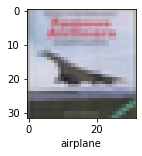

In [30]:
plot_sample(X_test, y_test,3)

In [31]:
classes[y_classes[3]]

'airplane'

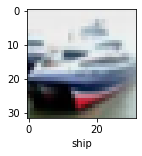

In [32]:
plot_sample(X_test, y_test,1)

In [34]:
classes[y_classes[1]]

'ship'

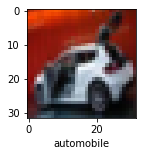

In [35]:
plot_sample(X_test, y_test,6)

In [36]:
classes[y_classes[6]]

'automobile'

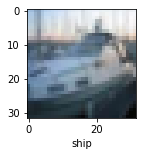

In [42]:
plot_sample(X_test, y_test,2)

In [43]:
classes[y_classes[2]]

'ship'